# Descripción de los clientes de Telecom LATAM

La siguiente notebook tiene como finalidad extraer y procesar la base de datos de clientes de Telecom LATAM. Se realiza una limpieza de datos para luego analizar la tasa de abandono del servicio en función de variables cuantitativas y cualitativas disponibles en la base de datos.
Esta información del tipo descriptiva permitirá ofrecer elementos que servirán a continuación para poder plantear un modelo predictivo de la tasa de abandono del servicio y también brindará herramientas y patrones que permitirán establecer cambios a fin de retener una mayor cantidad de clientes.
Se adjunta al final el informe final y se extrae la base de datos procesada.

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

clientes = pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")
clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
id_cus = clientes[['customerID', 'Churn']]

In [4]:
clientes_customer_norm = pd.json_normalize(clientes['customer'], meta=['customerID', 'Churn'])
clientes_phone_norm = pd.json_normalize(clientes['phone'], meta=['customerID', 'Churn'])
clientes_internet_norm = pd.json_normalize(clientes['internet'], meta=['customerID', 'Churn'])
clientes_account_norm = pd.json_normalize(clientes['account'], meta=['customerID', 'Churn'])

In [5]:
clientes_norm = pd.concat([id_cus, clientes_customer_norm, clientes_phone_norm, clientes_internet_norm, clientes_account_norm], axis=1)
clientes_norm.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [6]:
clientes_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
clientes_norm.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [8]:
clientes_norm.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
clientes_norm['Charges.Total'] = pd.to_numeric(clientes_norm['Charges.Total'], errors='coerce')
clientes_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
clientes_norm.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [11]:
print(clientes_norm.duplicated().sum())

0


In [12]:
for col in clientes_norm.columns:
  print(col, clientes_norm[col].unique())

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ['No' 'Yes' '']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['Yes' 'No' 'No internet service']
StreamingTV ['Yes' 'No' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automati

In [13]:
#Limpieza de datos
clientes_norm['customerID'] = clientes_norm['customerID'].str.strip()
clientes_norm['customerID'].sample(2)

,customerID
6157,8429-XIBUM
2769,3836-FZSDJ


In [14]:
clientes_norm['Contract'] = clientes_norm['Contract'].str.lower()
clientes_norm['Contract'] = clientes_norm['Contract'].str.replace(r'\-',' ', regex=True).str.strip()
clientes_norm['Contract'].sample(2)

,Contract
1233,month to month
1843,one year


In [15]:
clientes_norm['PaymentMethod'] = clientes_norm['PaymentMethod'].str.lower()
clientes_norm['PaymentMethod'] = clientes_norm['PaymentMethod'].str.replace(r'|','', regex=True).str.strip()
clientes_norm['PaymentMethod'].sample(2)

,PaymentMethod
2700,electronic check
2574,electronic check


In [16]:
#sacar faltantes de cargos totales
clientes_norm['Charges.Total']= clientes_norm['Charges.Total'].replace(' ', np.nan)
clientes_norm.dropna(subset=['Charges.Total'], inplace=True)
print(len(clientes_norm))

7256


In [17]:
col_binario=['Churn', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling']
clientes_norm[col_binario].sample(4)

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
584,No,No,No,Yes,Yes
2948,No,No,Yes,Yes,Yes
2377,No,No,No,Yes,Yes
6180,No,Yes,Yes,Yes,No


In [18]:
col_binario=['Churn', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling']

# Replace empty strings with NaN in binary columns
clientes_norm[col_binario] = clientes_norm[col_binario].replace('', np.nan)

# Fill NaN values with 0 (assuming empty means 'No' or 0 for these binary columns)
clientes_norm[col_binario] = clientes_norm[col_binario].fillna(0)

# Replace 'Yes' with 1 and 'No' with 0
clientes_norm[col_binario]= clientes_norm[col_binario].replace({'Yes':1, 'No':0})

# Convert to integer type
clientes_norm[col_binario] = clientes_norm[col_binario].astype(np.int64)

display(clientes_norm[col_binario].sample(4))

/tmp/ipython-input-1721299711.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clientes_norm[col_binario]= clientes_norm[col_binario].replace({'Yes':1, 'No':0})


,Churn,Partner,Dependents,PhoneService,PaperlessBilling
6706,0,0,0,1,1
5800,0,1,0,1,0
2539,0,1,1,1,1
4310,0,0,0,1,0


In [19]:
clientes_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

#📊 Carga y análisis

In [20]:
#se crea la columna Charges.Diary
clientes_norm['Charge.Diary'] = clientes_norm['Charges.Monthly']/30
clientes_norm.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charge.Diary
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40,2.796667


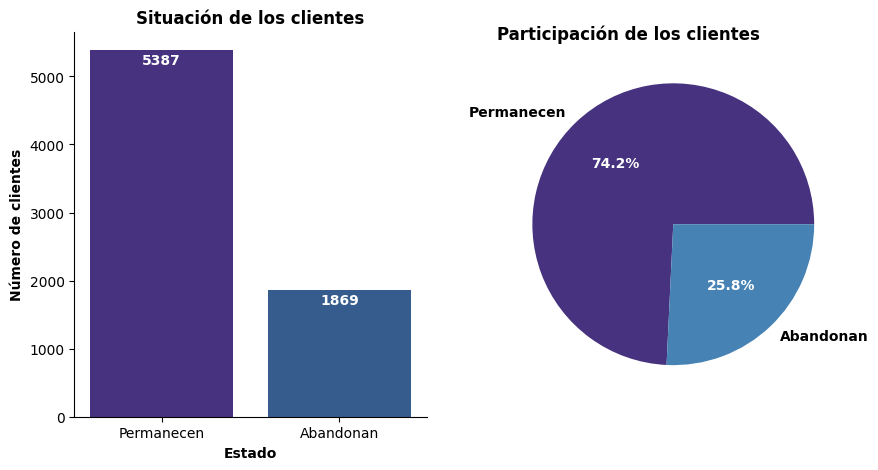

In [21]:
#Análisis del abandono
Churn_counts=clientes_norm['Churn'].value_counts().sort_index()
Churn_props=clientes_norm['Churn'].value_counts(normalize=True).sort_index()
labels=["Permanecen", "Abandonan"]
fig, axs = plt.subplots(1,2, figsize=(10,5))
colors = sns.color_palette("viridis")

#Gráfico de barras
bars=axs[0].bar(
    Churn_counts.index.map({0:labels[0], 1:labels[1]}),
    Churn_counts.values,
    color=colors[:2]
)
for ax in axs.flat:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0].set_title("Situación de los clientes", fontsize=12, weight='bold')
axs[0].set_xlabel("Estado", fontsize=10, weight='bold')
axs[0].set_ylabel("Número de clientes", fontsize=10, weight='bold')

for bar in bars:
  height = bar.get_height()
  axs[0].text(bar.get_x() + bar.get_width() / 2, height - 50, f'{height}', ha='center', va='top', fontsize=10, color='white', weight='bold') # Changed color to black and adjusted vertical position

axs[1].set_title("Participación de los clientes", fontsize=12, weight='bold',loc='left')
wedges, text, autotext = axs[1].pie(
    Churn_props.values,
    labels=Churn_props.index.map({0:labels[0], 1:labels[1]}),
    autopct='%1.1f%%',
    colors=[colors[0], 'steelblue'] # Change color of the second slice (Abandonan) to red
    )

# Set label text color and weight
for t in text:
    t.set_color('black') # Changed color to black
    t.set_weight('bold')

# Set percentage text color and weight
for at in autotext:
    at.set_color('white') # Changed color to black
    at.set_weight('bold')

plt.show()

In [22]:
# Se genera una lista de las variables categóricas
columnas_categoricas = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [23]:
#Iterar por variable categórica, calcular las cantidades y las proporciones de los clientes que permanecen o abandonan el servicio
churn_analysis_counts = {}
churn_analysis_props = {}

for col in columnas_categoricas:
    churn_analysis_counts[col] = clientes_norm.groupby(col)['Churn'].value_counts()
    churn_analysis_props[col] = clientes_norm.groupby(col)['Churn'].value_counts(normalize=True)

# Display the results for one column as an example
print("Tasa de abandono por 'gender':")
display(churn_analysis_counts['gender'])
print("\nChurn Proportions for 'gender':")
display(churn_analysis_props['gender'])

Churn Counts for 'gender':


gender  Churn
Female  0        2648
        1         939
Male    0        2739
        1         930
Name: count, dtype: int64


Churn Proportions for 'gender':


gender  Churn
Female  0        0.738221
        1        0.261779
Male    0        0.746525
        1        0.253475
Name: proportion, dtype: float64

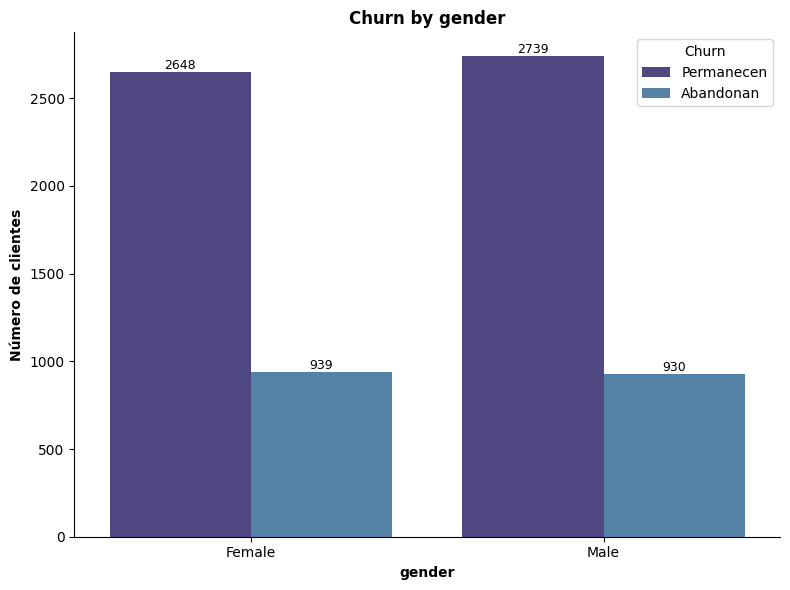

/tmp/ipython-input-3911166650.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([x_axis_labels[col][int(label.get_text())] for label in ax.get_xticklabels()])


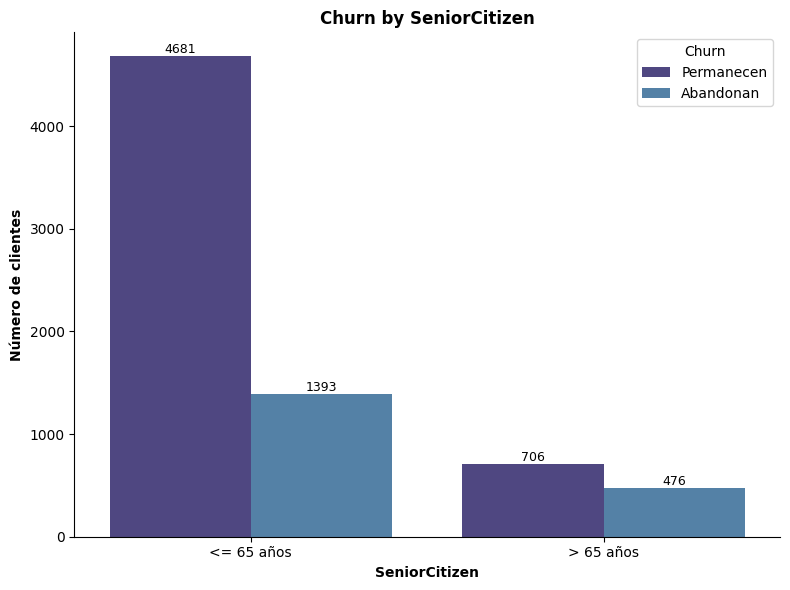

/tmp/ipython-input-3911166650.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([x_axis_labels[col][int(label.get_text())] for label in ax.get_xticklabels()])


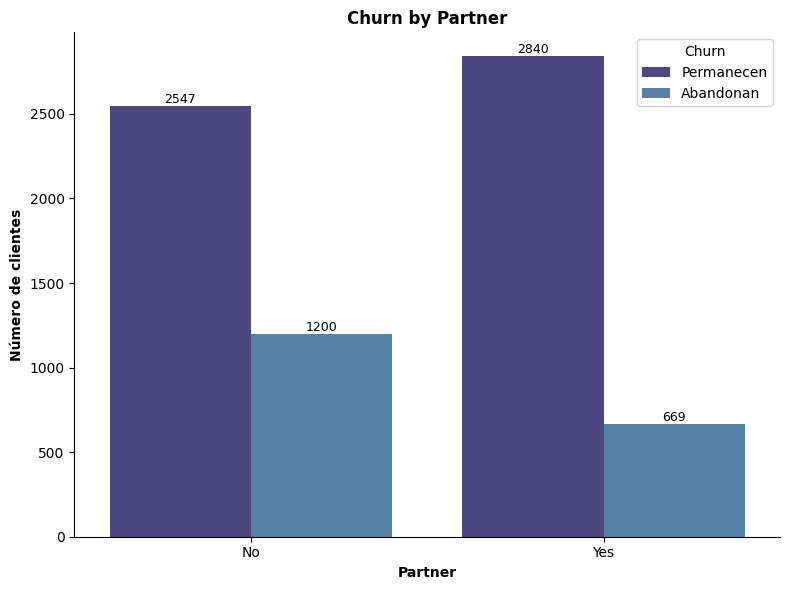

/tmp/ipython-input-3911166650.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([x_axis_labels[col][int(label.get_text())] for label in ax.get_xticklabels()])


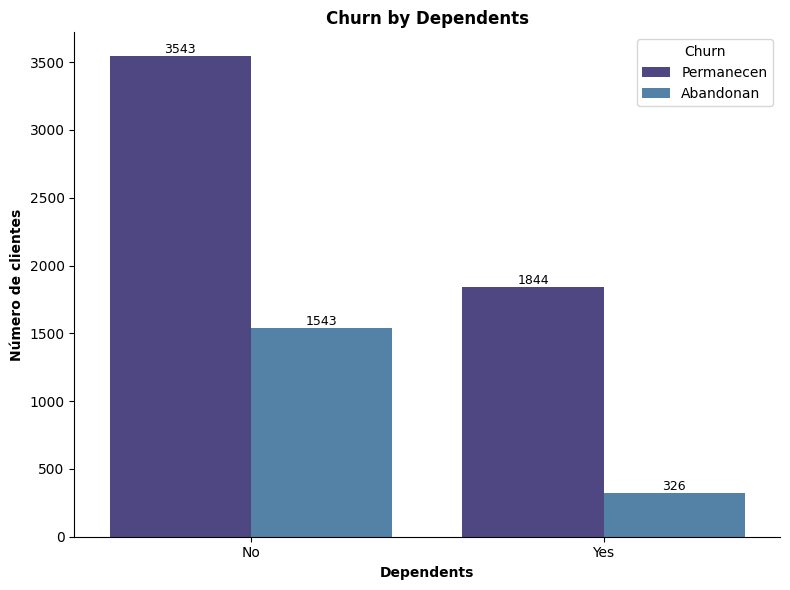

/tmp/ipython-input-3911166650.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([x_axis_labels[col][int(label.get_text())] for label in ax.get_xticklabels()])


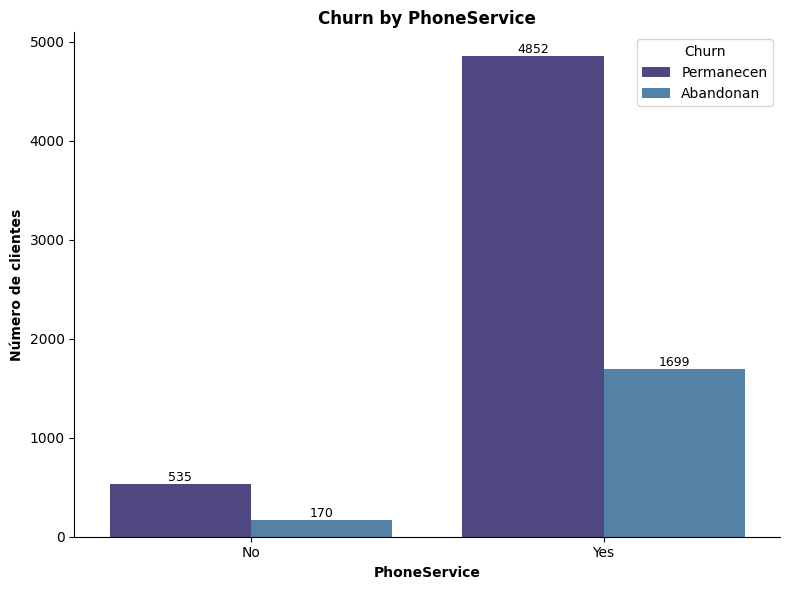

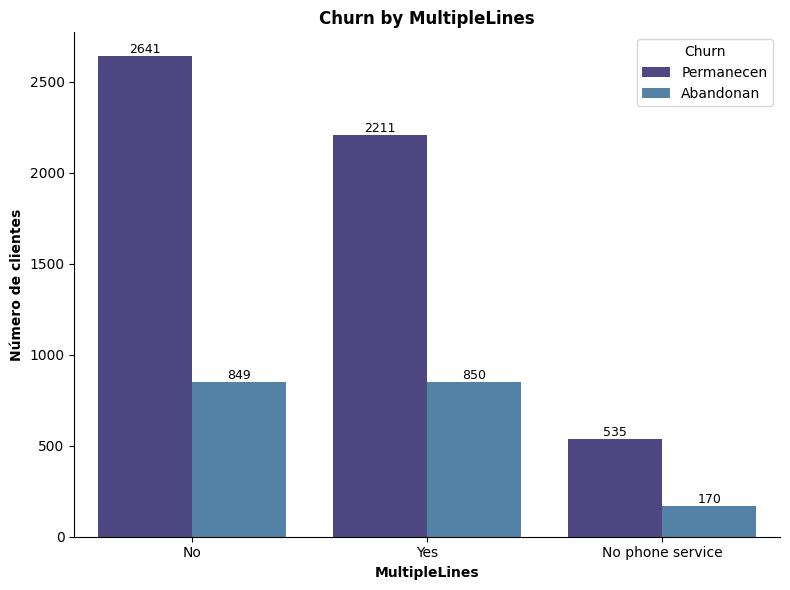

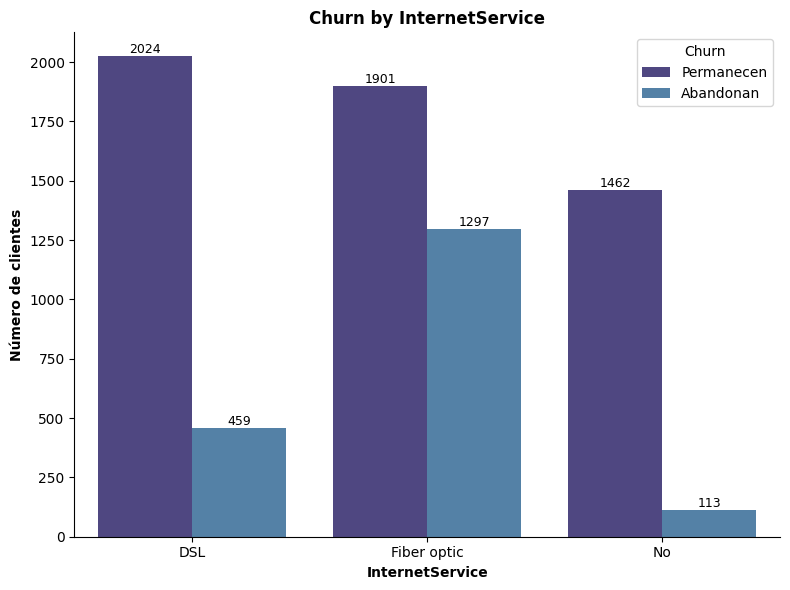

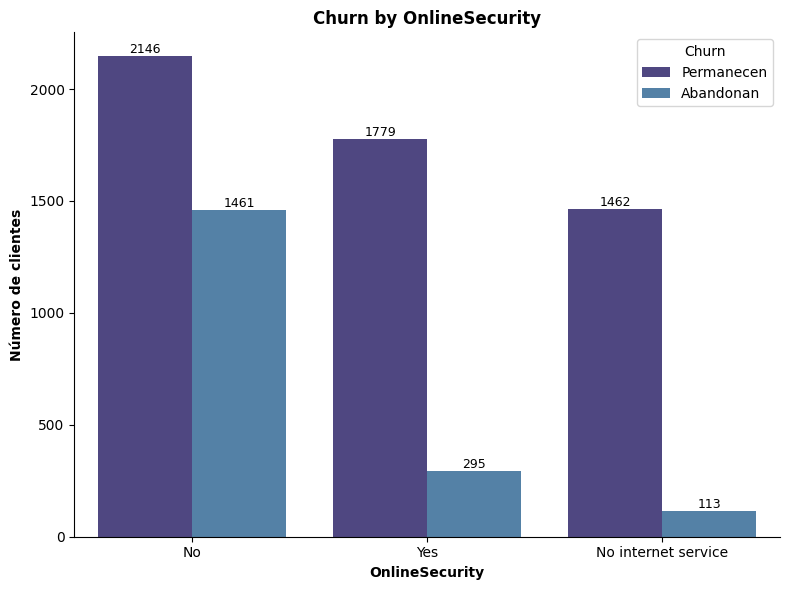

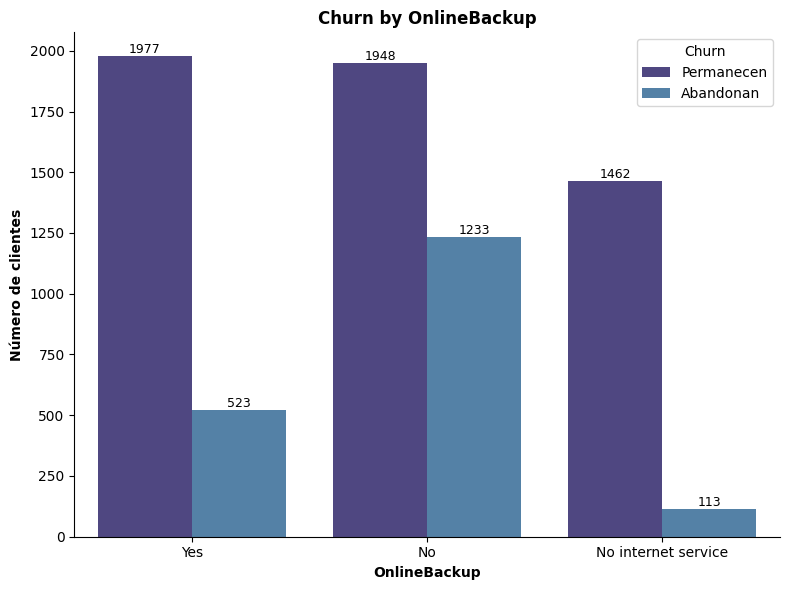

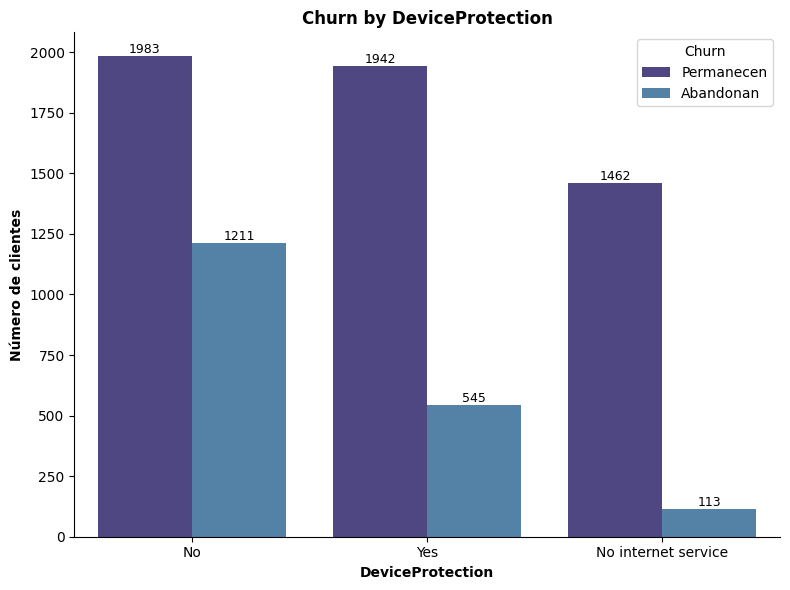

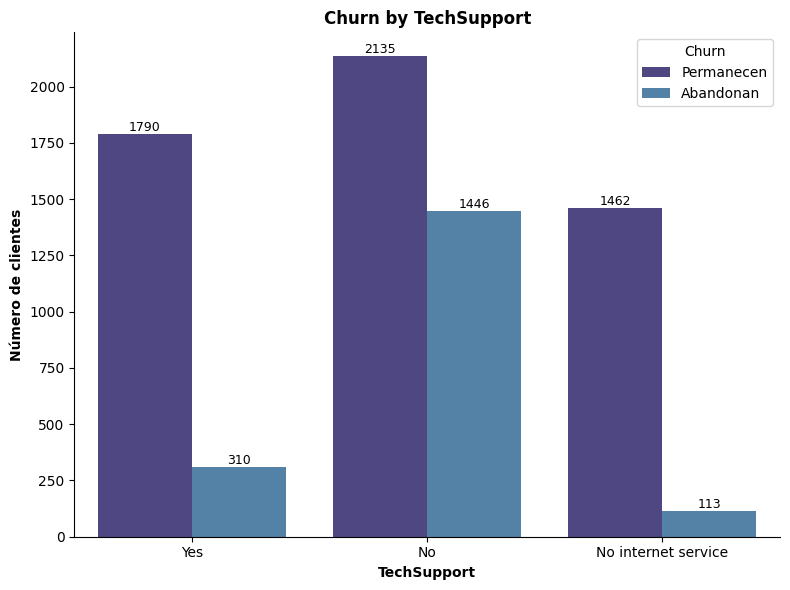

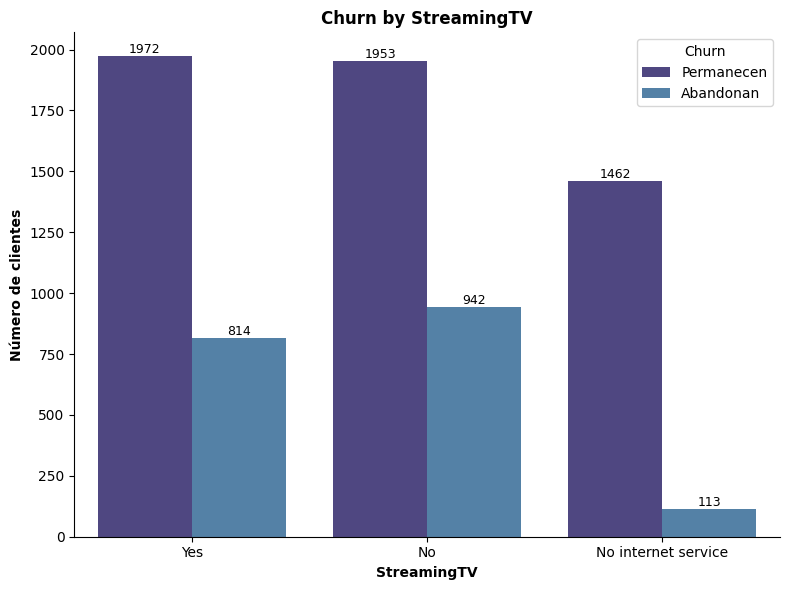

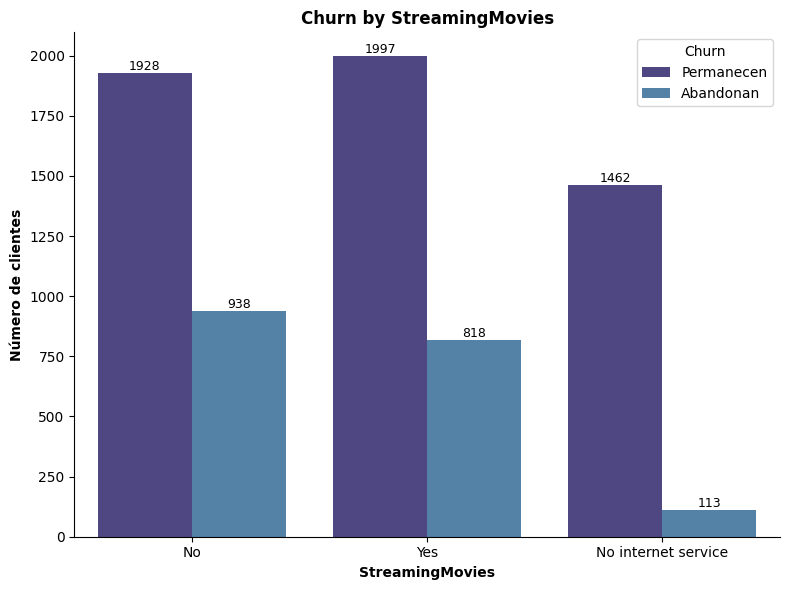

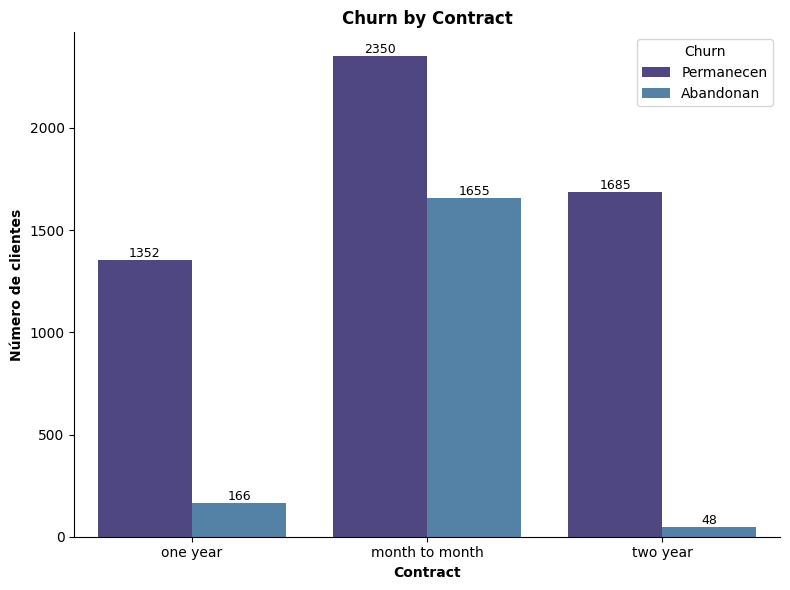

/tmp/ipython-input-3911166650.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([x_axis_labels[col][int(label.get_text())] for label in ax.get_xticklabels()])


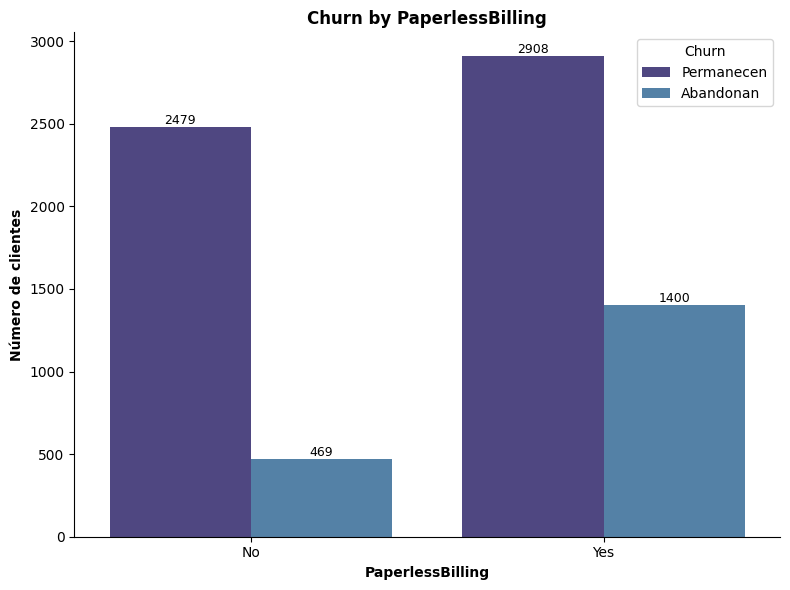

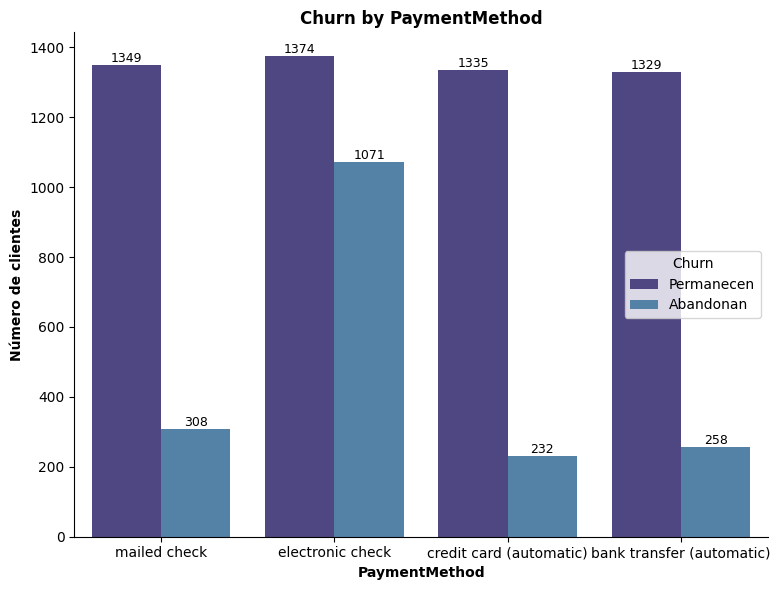

In [24]:
#Generación de gráficos para cada variable
# Define a mapping for Churn labels
churn_labels = {0: "Permanecen", 1: "Abandonan"}

# Define mappings for specific columns
x_axis_labels = {
    'Partner': {0: 'No', 1: 'Yes'},
    'Dependents': {0: 'No', 1: 'Yes'},
    'PhoneService': {0: 'No', 1: 'Yes'},
    'PaperlessBilling': {0: 'No', 1: 'Yes'},
    'SeniorCitizen': {0: '<= 65 años', 1: '> 65 años'}
}


for col in columnas_categoricas:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=clientes_norm, x=col, hue='Churn', palette=['darkslateblue', 'steelblue']) # Change colors
    plt.title(f'Tasa de abancono por {col}', fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10, weight='bold')
    plt.ylabel("Número de clientes", fontsize=10, weight='bold')

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=9)

    # Customize legend labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [churn_labels[int(label)] for label in labels], title='Churn')

    # Customize x-axis labels for specific columns
    if col in x_axis_labels:
        ax.set_xticklabels([x_axis_labels[col][int(label.get_text())] for label in ax.get_xticklabels()])


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

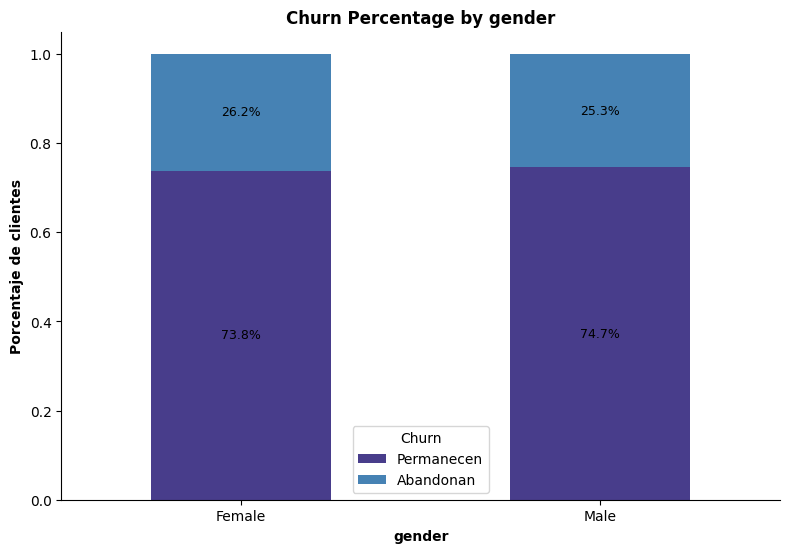

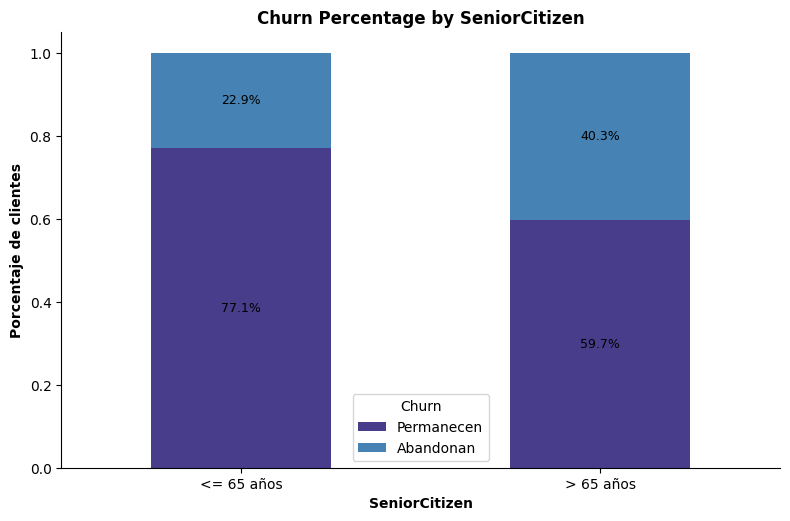

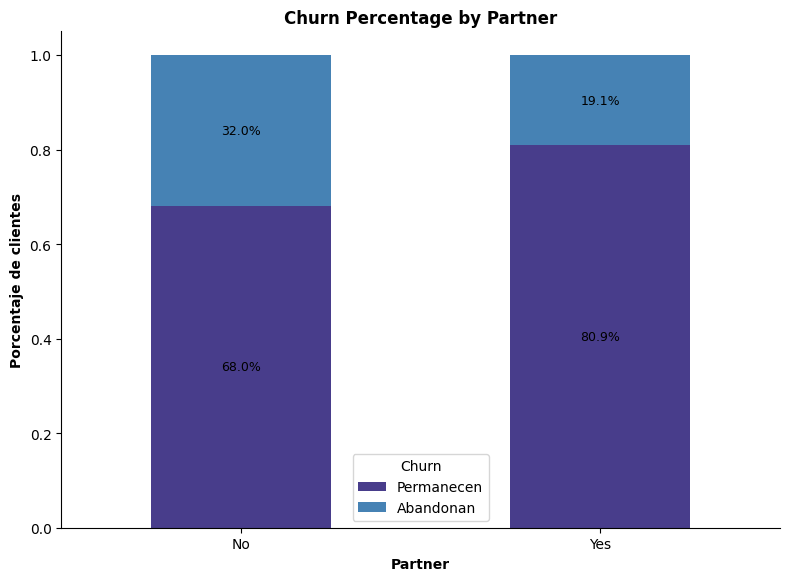

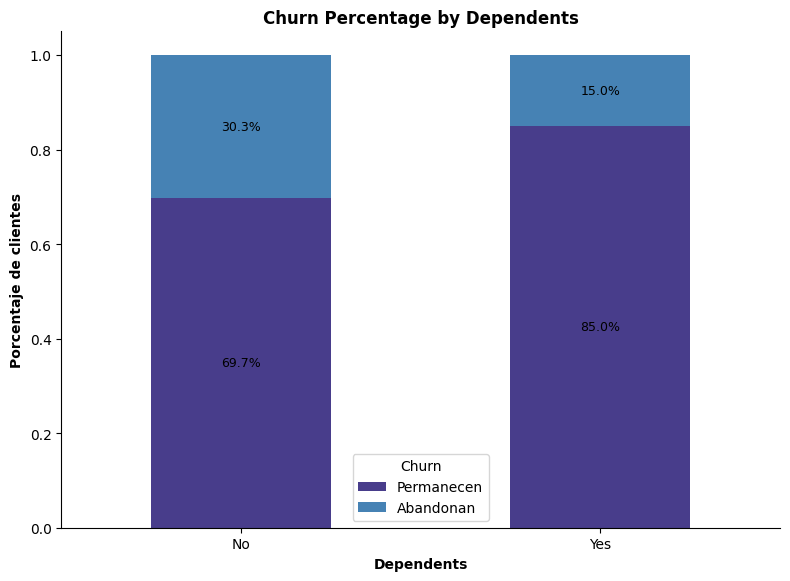

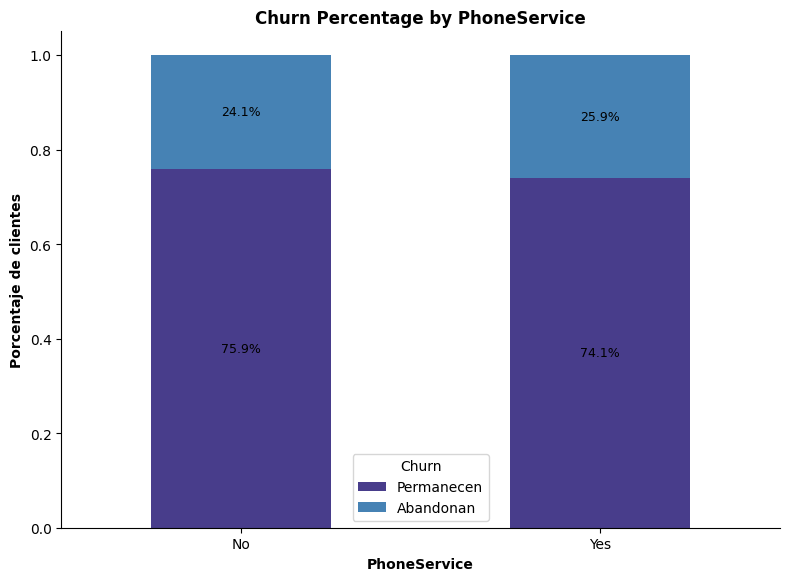

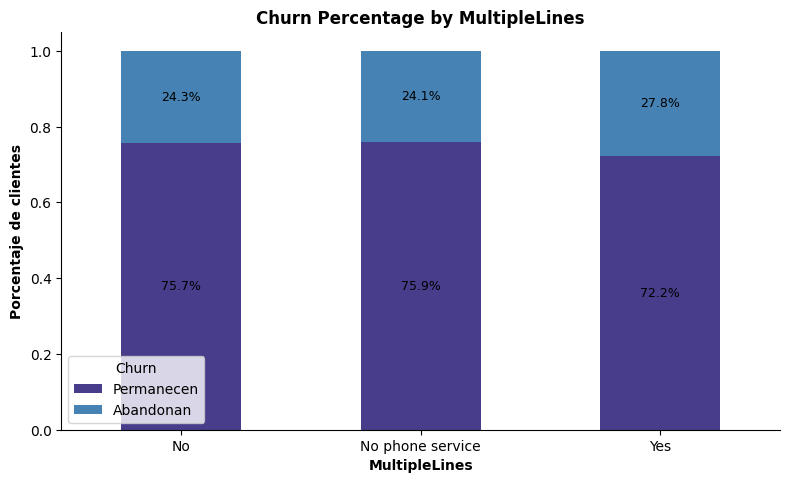

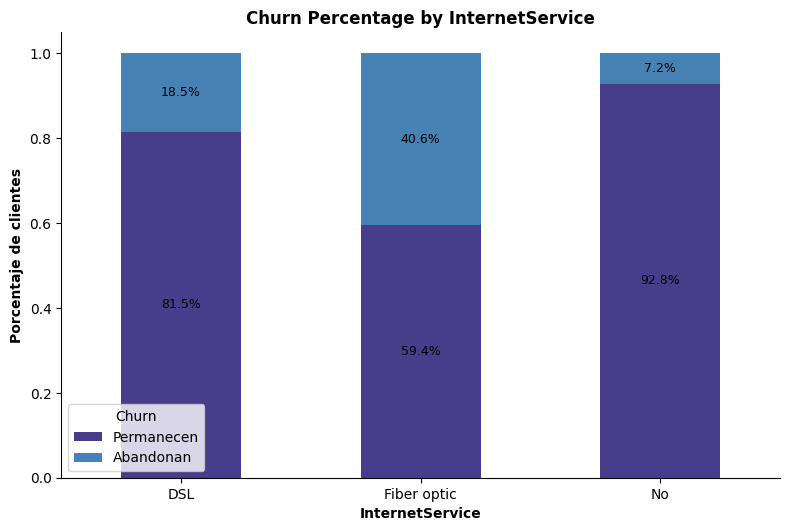

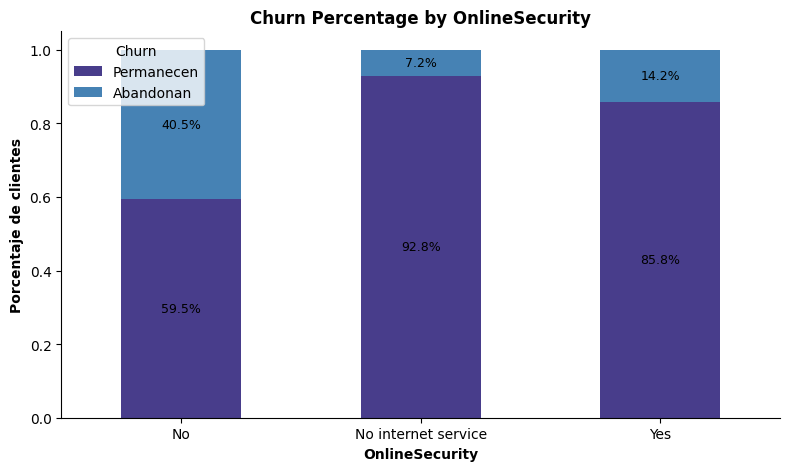

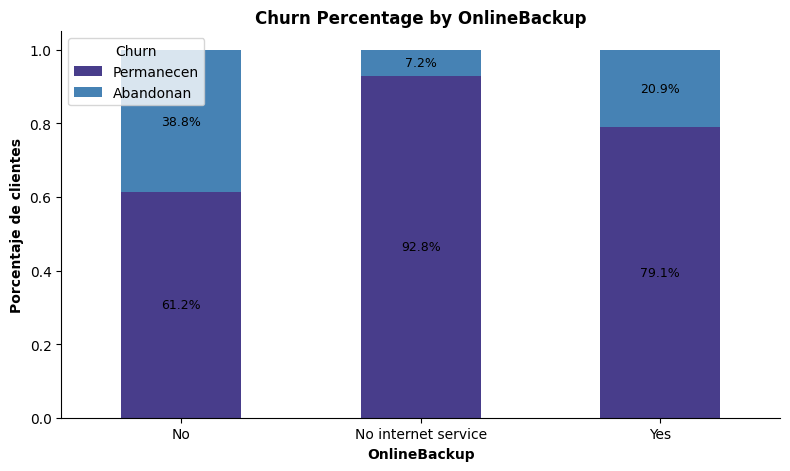

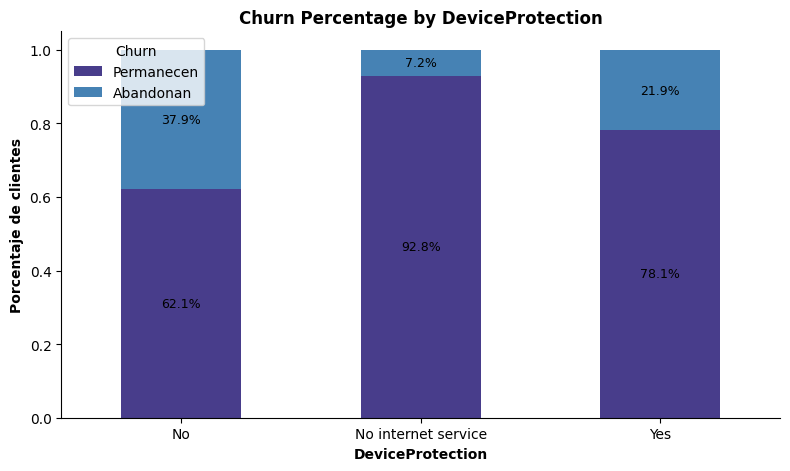

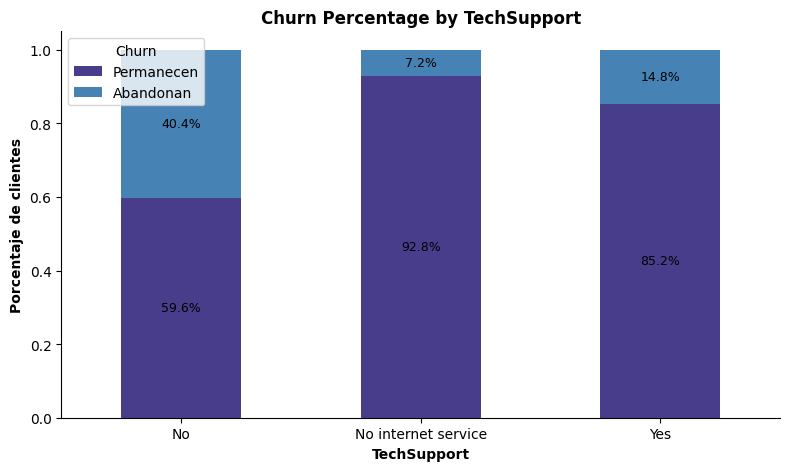

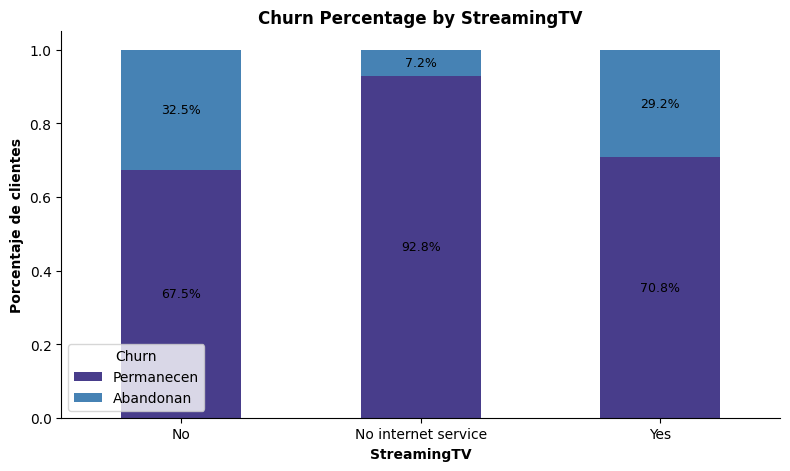

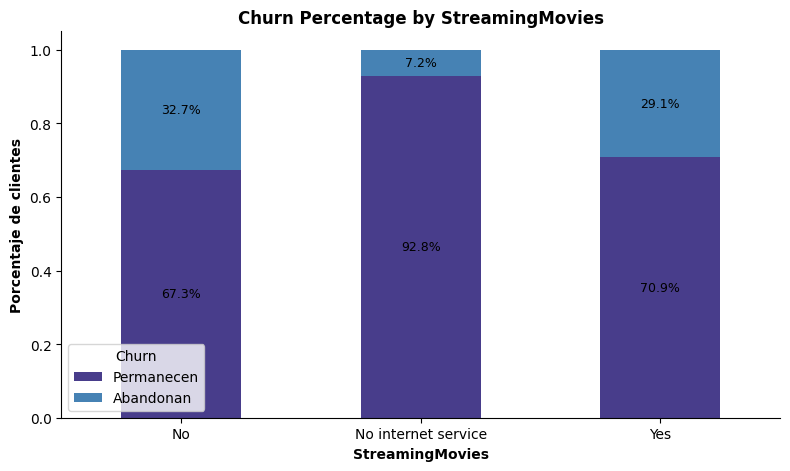

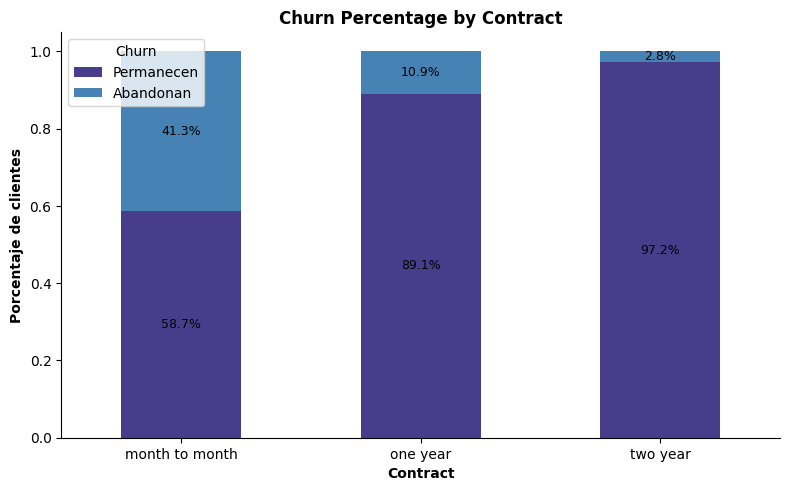

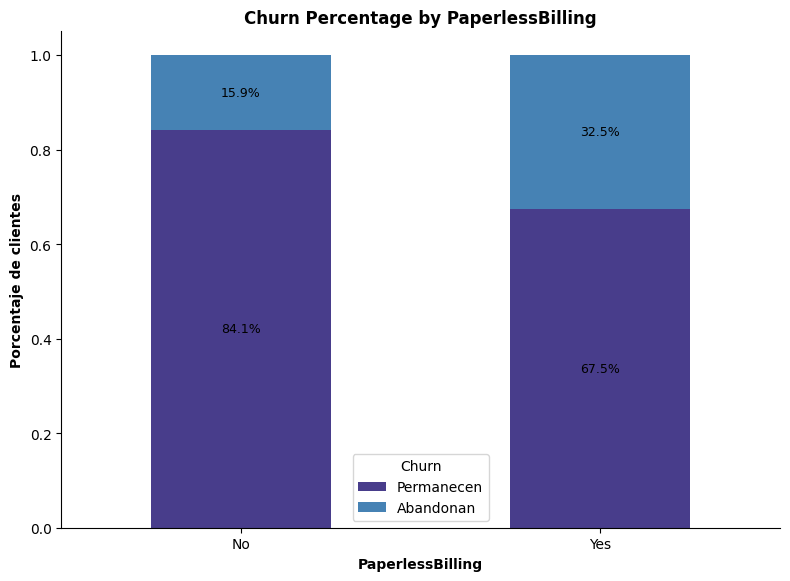

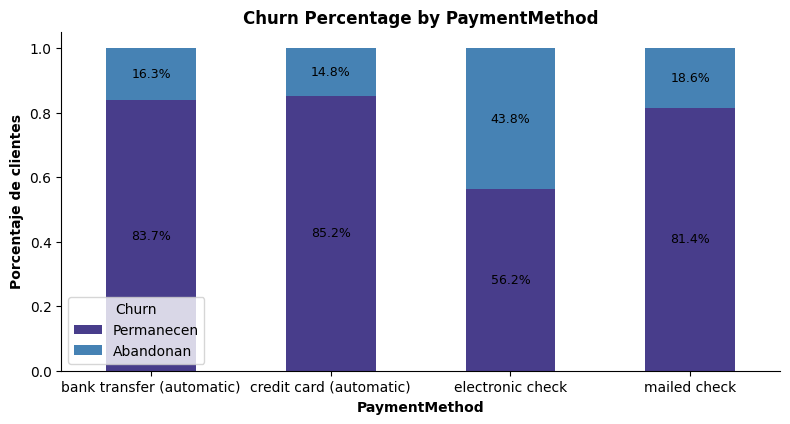

In [25]:
#Mismo análisis pero en porcentaje
# Define a mapping for Churn labels
churn_labels = {0: "Permanecen", 1: "Abandonan"}

# Define mappings for specific columns
x_axis_labels = {
    'Partner': {0: 'No', 1: 'Yes'},
    'Dependents': {0: 'No', 1: 'Yes'},
    'PhoneService': {0: 'No', 1: 'Yes'},
    'PaperlessBilling': {0: 'No', 1: 'Yes'},
    'SeniorCitizen': {0: '<= 65 años', 1: '> 65 años'}
}


for col in columnas_categoricas:
    plt.figure(figsize=(8, 6))

    # Get churn proportions for the current column
    churn_props_col = churn_analysis_props[col].unstack()

    # Create a stacked bar plot for percentages
    ax = churn_props_col.plot(kind='bar', stacked=True, color=['darkslateblue', 'steelblue'], ax=plt.gca())

    plt.title(f'Porcentaje de abandono por {col}', fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10, weight='bold')
    plt.ylabel("Porcentaje de clientes", fontsize=10, weight='bold')

    # Customize legend labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [churn_labels[int(label)] for label in labels], title='Churn')

    # Add percentage labels on the bars
    for container in ax.containers:
        labels = [f'{w:.1f}%' if (w := v.get_height() * 100) > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=9)


    # Customize x-axis labels for specific columns
    if col in x_axis_labels:
        ax.set_xticklabels([x_axis_labels[col][float(label.get_text())] for label in ax.get_xticklabels()])


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.xticks(rotation=0) # Keep x-axis labels horizontal for better readability
    plt.show()

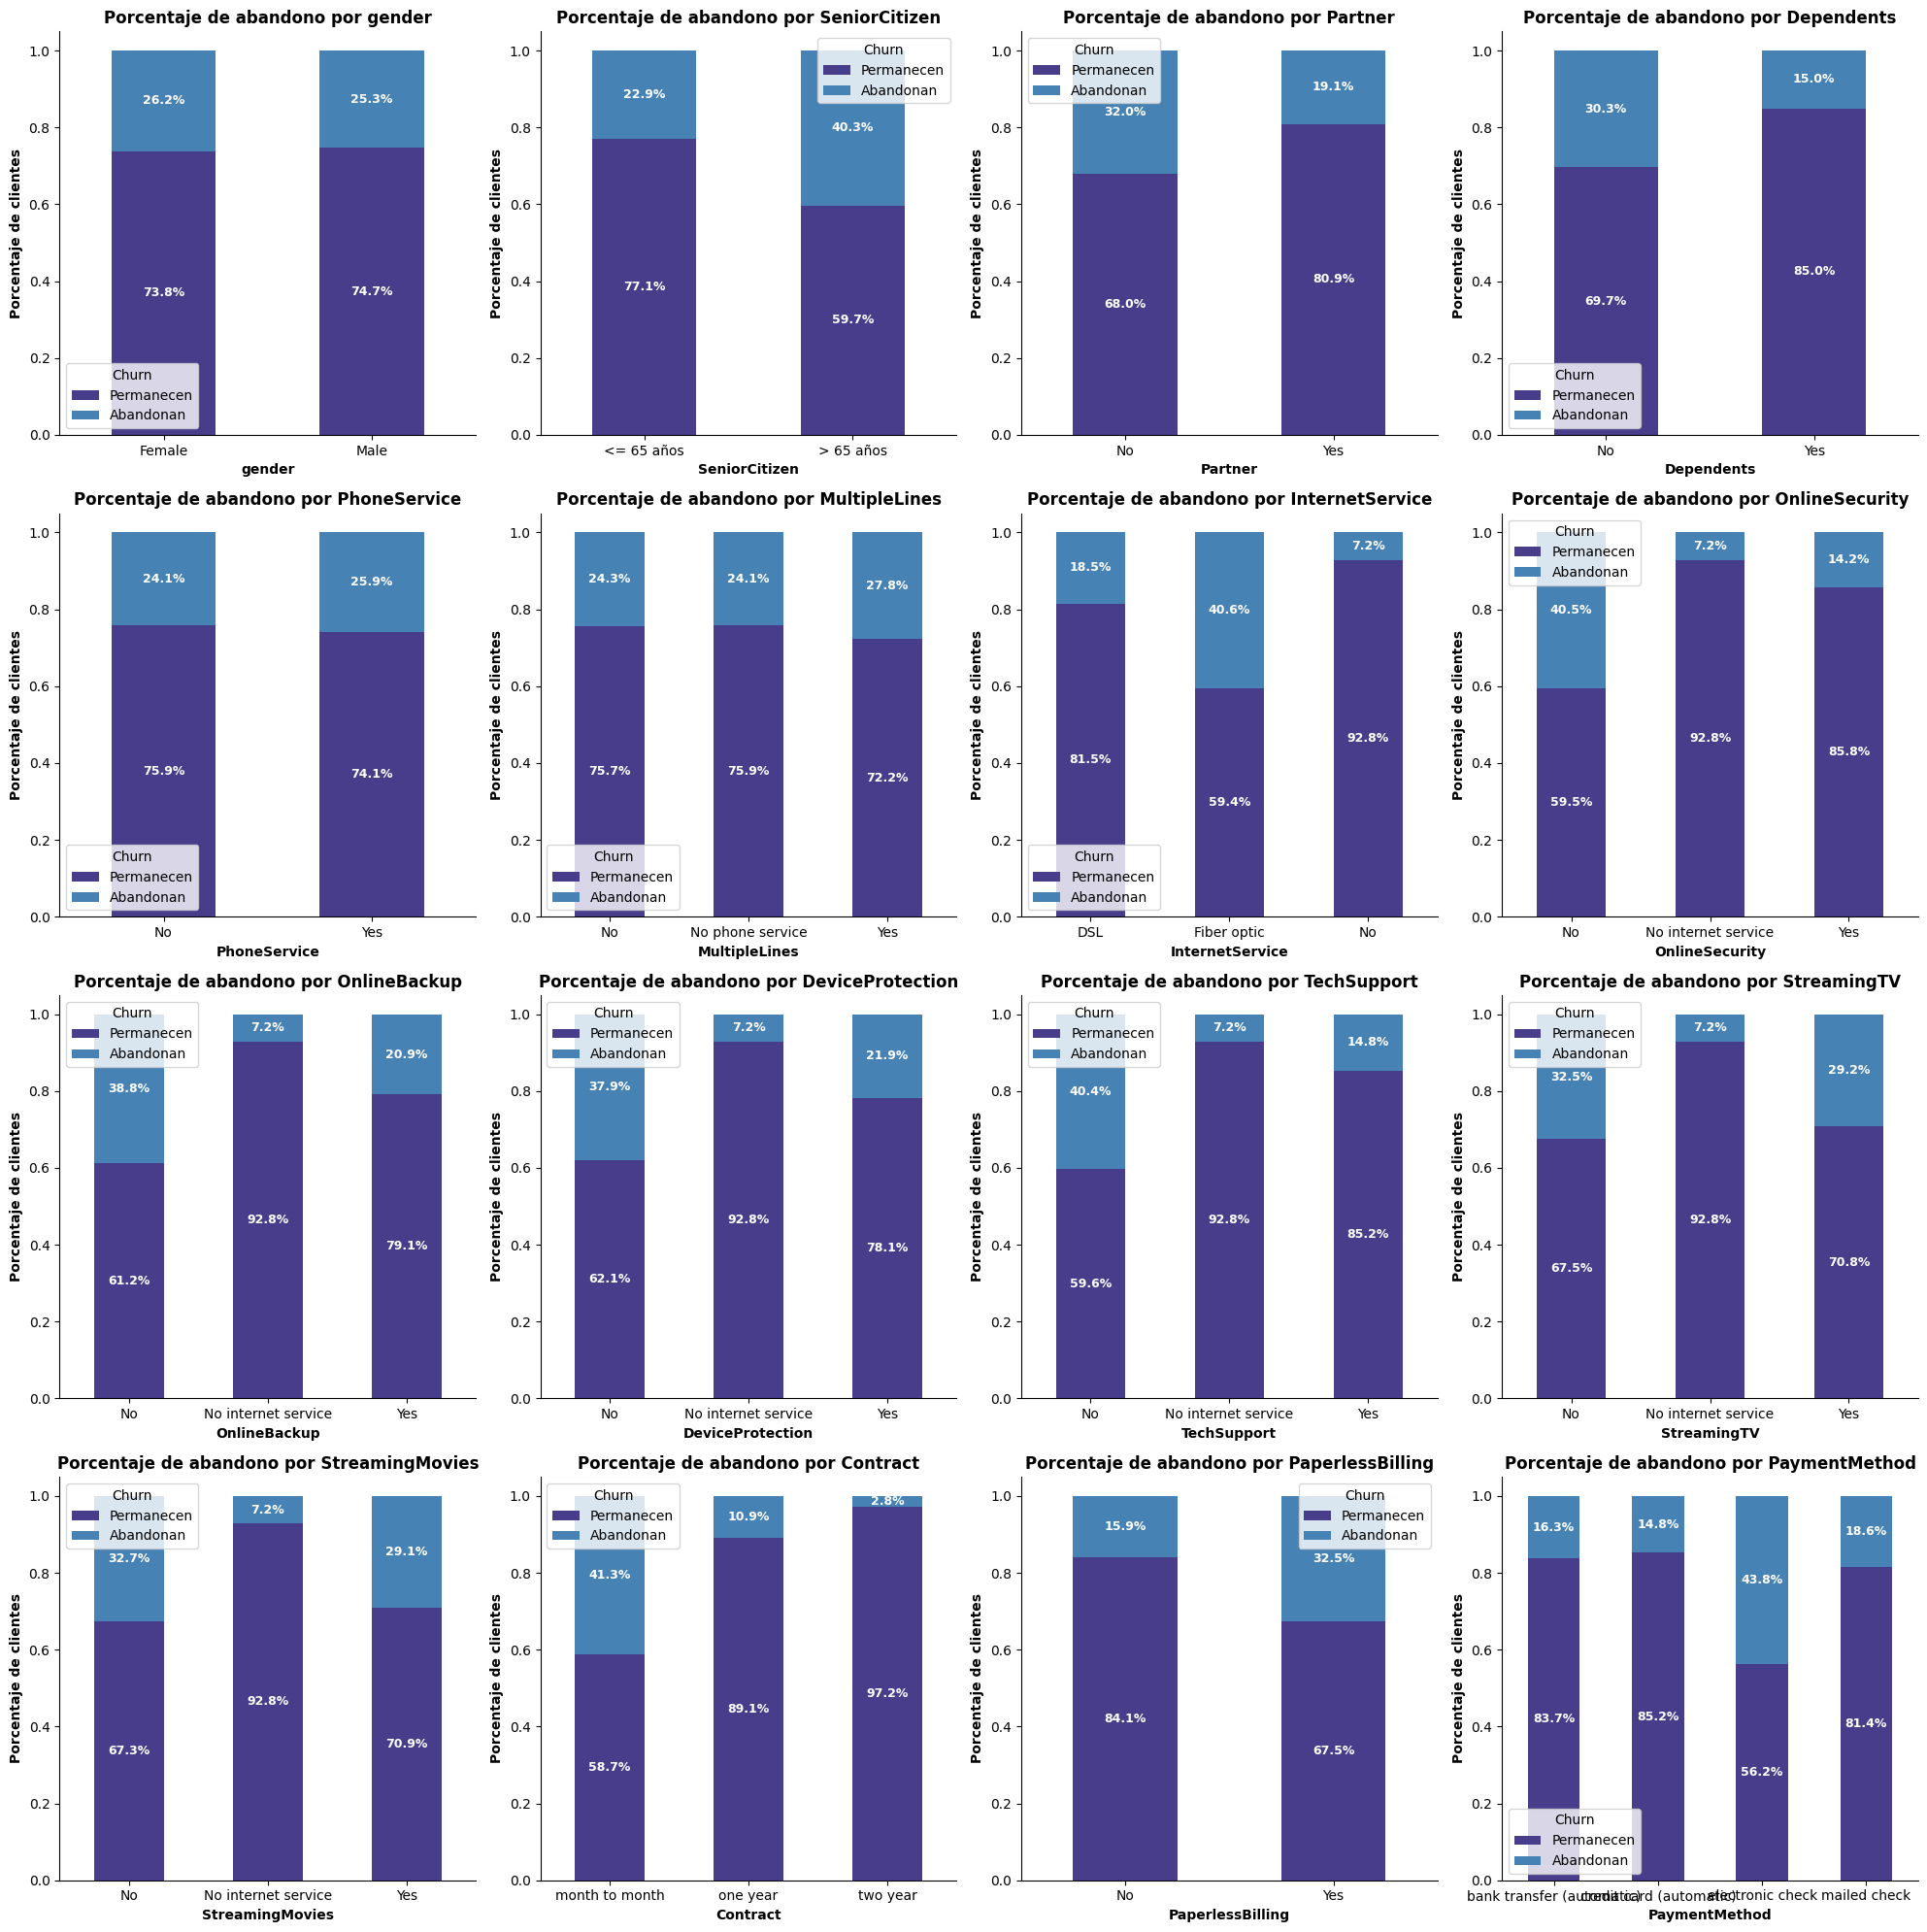

In [32]:
# Generar todos los gráficos de participación en el abandono del servicio en una sola imagen con varios subplots
# Define a mapping for Churn labels
churn_labels = {0: "Permanecen", 1: "Abandonan"}

# Define mappings for specific columns
x_axis_labels = {
    'Partner': {0: 'No', 1: 'Yes'},
    'Dependents': {0: 'No', 1: 'Yes'},
    'PhoneService': {0: 'No', 1: 'Yes'},
    'PaperlessBilling': {0: 'No', 1: 'Yes'},
    'SeniorCitizen': {0: '<= 65 años', 1: '> 65 años'}
}

# Calculate the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columnas_categoricas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columnas_categoricas):
    ax = axes[i]
    # Get churn proportions for the current column
    churn_props_col = churn_analysis_props[col].unstack()

    # Create a stacked bar plot for percentages
    churn_props_col.plot(kind='bar', stacked=True, color=['darkslateblue', 'steelblue'], ax=ax)

    ax.set_title(f'Porcentaje de abandono por {col}', fontsize=12, weight='bold')
    ax.set_xlabel(col, fontsize=10, weight='bold')
    ax.set_ylabel("Porcentaje de clientes", fontsize=10, weight='bold')

    # Customize legend labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [churn_labels[int(label)] for label in labels], title='Churn')

    # Add percentage labels on the bars
    for container in ax.containers:
        labels = [f'{w:.1f}%' if (w := v.get_height() * 100) > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center',color='white', fontsize=9, weight='bold')

    # Customize x-axis labels for specific columns
    if col in x_axis_labels:
        ax.set_xticklabels([x_axis_labels[col][float(label.get_text())] for label in ax.get_xticklabels()])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=0) # Keep x-axis labels horizontal for better readability


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

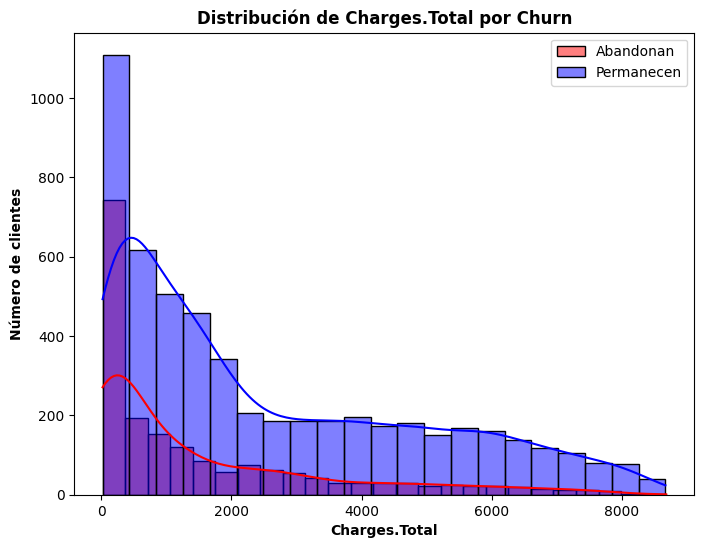

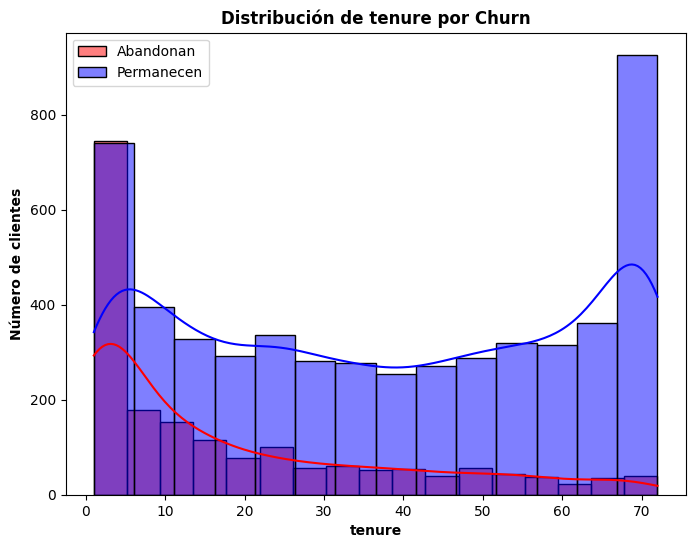

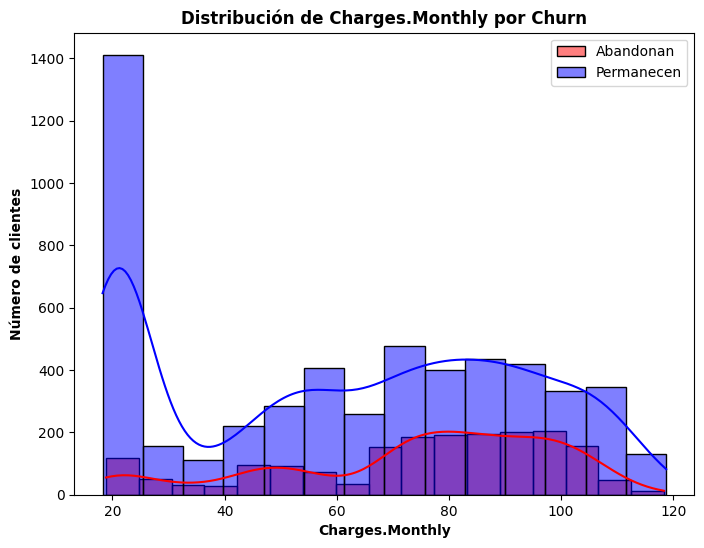

In [26]:
#Análisis de las variables numéricas
# Separar los datos por Churn
churn_yes = clientes_norm[clientes_norm['Churn'] == 1]
churn_no = clientes_norm[clientes_norm['Churn'] == 0]

# Definir las variables numéricas a analizar
numeric_cols = ['Charges.Total', 'tenure', 'Charges.Monthly']

# Visualizar la distribución de las variables numéricas para cada grupo
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=churn_yes, x=col, color='red', kde=True, label='Abandonan')
    sns.histplot(data=churn_no, x=col, color='blue', kde=True, label='Permanecen')
    plt.title(f'Distribución de {col} por Churn', fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10, weight='bold')
    plt.ylabel("Número de clientes", fontsize=10, weight='bold')
    plt.legend()
    plt.show()

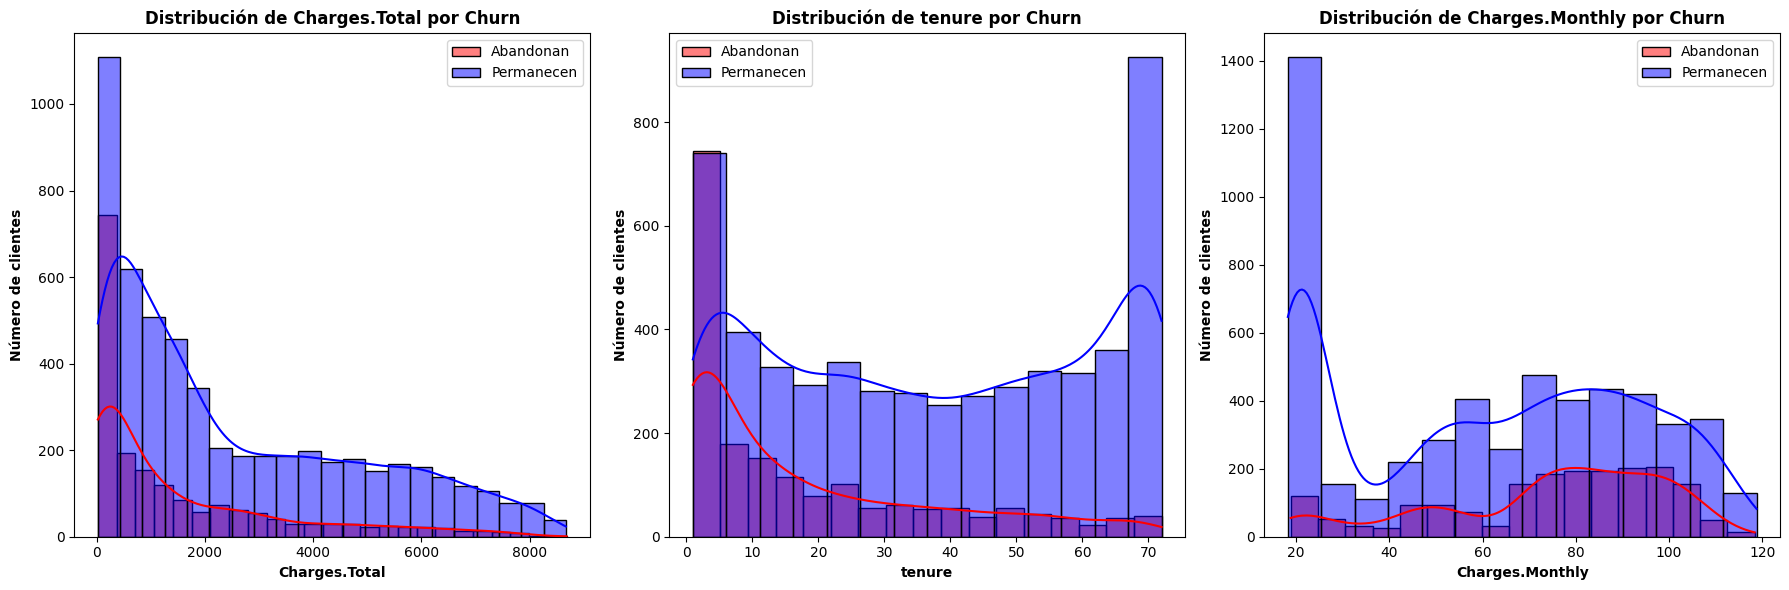

In [33]:
# Generar los histogramas de las variables numéricas en una sola imagen con subplots
# Separar los datos por Churn
churn_yes = clientes_norm[clientes_norm['Churn'] == 1]
churn_no = clientes_norm[clientes_norm['Churn'] == 0]

# Definir las variables numéricas a analizar
numeric_cols = ['Charges.Total', 'tenure', 'Charges.Monthly']

# Calcular el número de filas y columnas para subplots
n_cols = 3 # Since there are 3 numeric variables
n_rows = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Visualizar la distribución de las variables numéricas para cada grupo
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(data=churn_yes, x=col, color='red', kde=True, label='Abandonan', ax=ax)
    sns.histplot(data=churn_no, x=col, color='blue', kde=True, label='Permanecen', ax=ax)
    ax.set_title(f'Distribución de {col} por Churn', fontsize=12, weight='bold')
    ax.set_xlabel(col, fontsize=10, weight='bold')
    ax.set_ylabel("Número de clientes", fontsize=10, weight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

## Mapa de Calor de Correlación de Variables Numéricas

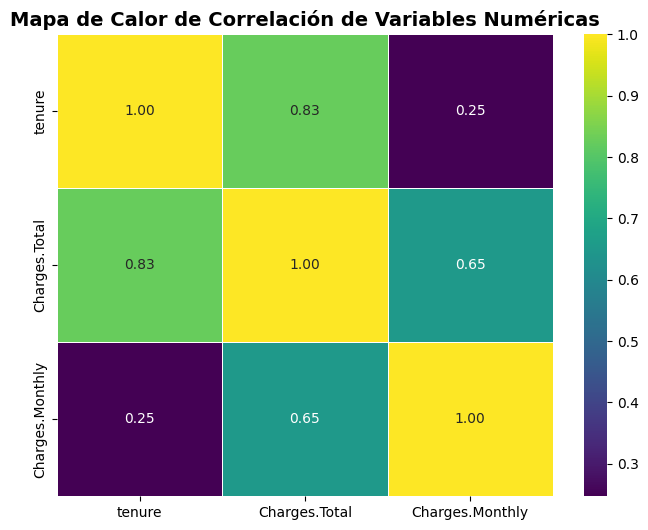

In [27]:

numeric_cols = ['tenure', 'Charges.Total', 'Charges.Monthly']
correlation_matrix = clientes_norm[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=14, weight='bold')
plt.show()

## Exportación de la base de datos

In [28]:
df_telecomX = clientes_norm.copy()
df_telecomX.to_csv('df_telecomX.csv', index=False)

#📄Informe final

## Introducción
Lo realizado tiene la finalidad de extraer y procesar la base de datos de clientes de Telecom LATAM. Se realiza una limpieza de datos para luego analizar la tasa de abandono del servicio en función de variables cuantitativas y cualitativas disponibles en la base de datos.
Esta información del tipo descriptiva permitirá ofrecer elementos que servirán a continuación para poder plantear un modelo predictivo de la tasa de abandono del servicio y también brindará herramientas y patrones que permitirán establecer cambios a fin de retener una mayor cantidad de clientes.

## Extracción
La información se extrajo de un archivo con formato JSON, por lo cual hubo que normalizar la información para que quedara con un formato de base de datos.


## Transformación
El proceso de transformación llevó primero a una inspección general con el diccionario para observar y entender las variables de la base de datos.
Una vez que se inspeccionó se determinó que contaba con 7.267 filas y 21 variables.


*   Se visualizó el tipo de variables.
*   Se observó la existencia de valores nulos.
*   Se transformó la variable cargos totales y se eliminaro aquellos clientes que no contaban con ningun gasto en esta variable.
*   Se analizó la existencia de valores duplicados.
*   Se modificó el formato de las variables que contaban con palabras.
*   Se expresaron las variables categóricas en el formato 0 y 1.








## Carga y análisis

### Análisis descriptivo
Se realiza un análisis descriptivo de la variable abandono y permanencia de los clientes. Este análisis se realiza desagregando tanto para las variables categóricas como las variables continuas. Los principales **insigths** que se desprenden del análisis gráfico y analítico son los siguientes:
*   Se obseva que solo el 25,8% de los clientes abandonan la compañía. Del total de clientes, 7.256 por lo tanto, 1.869 abandonan la empresa.
*   Hay 3.407 mujeres en la base de datos y 3.669 hombres clientes, por lo tanto esta variable se encuentra balanceada, es por ello que las participaciones tienen sentido, permanecen en ambos casos aproximadamente el 74% de los clientes. Ahora cuando observamos si los clientes son mayores o menores de 65 años, se deduce que la mayor cantidad de clientes se concentra en el estrato menores de 65, el total de clientes mayores de 65 no alcanzan a los que abandonan que son menores de 65 años (1.393 clientes contra 1.182 clientes mayores de 65 años). Cuando se miran las participaciones se ve que en los mayores de 65 años la proporción de clientes que abandona es mayor que en la de menores de 65 años, no obstante, la empresa debería buscar la manera de retener aquellos de menor rango etáreo que concentran la mayor proporción de clientes. Insight: Un punto a destacar es quienes reciben servicio de internet por fibra óptica que tienen una alta tasa de abandono, algo similar ocurre con quienes no tiene servicio de seguridad online, online back up, protección del dispositivo y soporte técnico, es por ello que pensar en un servicio con prestaciones integradas puede hacer que la tasa de abandono caiga. Insight: En el caso de contrato mes a mes 1.655 clientes abandonan la compañía, es por ello que pensar en contratos con mayor horizonte temporal o con beneficios por un año, para que se mantengan dentro de la empresa. Insight: En el caso de método de pago el cheque electrónico presenta un abandono de 1.071 clientes es por ello, que pensar en promocionar el resto de los métodos de pagos que tienen menor abandono o corroborar que los clientes no esten teniendo problemas al momento de realizar el pago.
*   De las variables numéricas se corrobora la información obtenidad del análisis anterior cuando los cargos son mensuales el abandono muestra una concentración hacia gastos más altos, no obstante esto no sucede con el cargo total, vinculado con la existencia de contratos mes a mes donde se observaba una alta tasa de abondono. Nuevamente, el ternure, mide los meses de contrato del cliente, a medida que aumenta la cantidad de meses el abandono cae. Pensar en contratos más largos o con beneficios para una cantidad de meses puede der una buena política de retención de clientes.
*  De las variables numéricas se corrobora la información obtenidad del análisis anterior cuando los cargos son mensuales el abandono muestra una concentración hacia gastos más altos, no obstante esto no sucede con el cargo total, vinculado con la existencia de contratos mes a mes donde se observaba una alta tasa de abondono. Nuevamente, el ternure, mide los meses de contrato del cliente, a medida que aumenta la cantidad de meses el abandono cae. Pensar en contratos más largos o con beneficios para una cantidad de meses puede der una buena política de retención de clientes.








## Recomendaciones:

Se recomienda a la empresa pensar en políticas de prestación del servicio con mayor duración, contratos más largos o en su defecto, contratos mensuales pero con beneficios a largo plazo, para disminuir la tasa de abandono que ocurre en los primeros meses de prestación del servicio.
También observar los vínculos existentes entre quienes abandonan y los servicios que se prestan pueden llegar a retener clientes al brindarle paquete de servicios que le sean de utilidad a los clientes.